<a href="https://colab.research.google.com/github/DY29/SBAacademy_Bigdata/blob/master/%EB%94%B0%EB%A6%89%EC%9D%B4_Pycon2019.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import requests
from bs4 import BeautifulSoup as bs
import random
import time
import pandas as pd

In [0]:
import warnings
warnings.filterwarnings('ignore')

In [0]:
import pandas as pd
import seaborn as sns
import re

In [0]:
import folium

In [0]:
import matplotlib.pyplot as plt
from IPython.display import set_matplotlib_formats

In [0]:
plt.rc('font',family = 'AppleGothic')
plt.rc('axes', unicode_minus = False)
set_matplotlib_formats('retina')
%matplotlib inline

In [12]:
# 나눔고딕 설치
!apt -qq -y install fonts-nanum > /dev/null

import matplotlib.font_manager as fm

fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=9)
fm._rebuild()

# 그래프에 retina display 적용
%config InlineBackend.figure_format = 'retina'

# Colab 의 한글 폰트 설정
plt.rc('font', family='NanumBarunGothic') 

In [11]:
# 구글 드라이브에서 csv 파일을 읽어오기 위해 gauth 인증을 한다.
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# PyDrive client 인증
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

     |████████████████████████████████| 993kB 5.0MB/s 


In [13]:
# 공유 가능한 링크로 파일 가져오기
url ='https://drive.google.com/open?id=1PbU3obWSNc7ADD2sAF2Anhb9HYH8JsDL'
id = url.split('=')[1]
print(id)
downloaded = drive.CreateFile({'id':id}) 
# data폴더에 데이터를 따로 모아 관리한다.
%mkdir data
downloaded.GetContentFile('data/seoul_bike_station.csv')  

1PbU3obWSNc7ADD2sAF2Anhb9HYH8JsDL


In [15]:
df = pd.read_csv('data/seoul_bike_station.csv')
df.shape

(1529, 7)

In [16]:
df.dtypes

대여소번호    float64
대여소       object
거치대수       int64
상태        object
주소        object
위도       float64
경도       float64
dtype: object

In [17]:
df.head()

,대여소번호,대여소,거치대수,상태,주소,위도,경도
0,1001.0,광진교 남단 사거리(디지털프라자앞),15,운영중,서울특별시 강동구 구천면로 171 376 남단사거리,37.541805,127.124718
1,1002.0,해공공원(천호동),10,운영중,서울특별시 강동구 올림픽로 702 265,37.545219,127.125916
2,1003.0,해공도서관앞,20,운영중,서울특별시 강동구 올림픽로 702 367,37.543915,127.125458
3,1004.0,삼성광나루아파트 버스정류장,10,운영중,서울특별시 강동구 상암로3길 77 암사동 534,37.553349,127.128860
4,1006.0,롯데캐슬 115동앞,15,운영중,서울특별시 강동구 양재대로 1665 명일동 304,37.554920,127.142799


In [18]:
df.tail()

,대여소번호,대여소,거치대수,상태,주소,위도,경도
1524,971.0,역촌 센트레빌 아파트,10,운영중,서울특별시 은평구 갈현로3나길 23 역촌 센트레빌 아파트 107동 인근,37.602329,126.906548
1525,972.0,수색역,20,운영중,서울특별시 은평구 수색로 261 수색역,37.582161,126.894928
1526,9996.0,시설2,1,운영중,서울특별시 성동구 청계천로 540 서울시설공단 공공자전거 운영처,0.000000,0.000000
1527,NaN,위트콤,14,운영중,서울특별시 서초구 방배로 110 위트콤,0.000000,0.000000
1528,NaN,위트콤공장,66,운영중,서울특별시 서초구 방배로 110 석교빌딩 4층,0.000000,0.000000


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1529 entries, 0 to 1528
Data columns (total 7 columns):
대여소번호    1527 non-null float64
대여소      1529 non-null object
거치대수     1529 non-null int64
상태       1529 non-null object
주소       1529 non-null object
위도       1529 non-null float64
경도       1529 non-null float64
dtypes: float64(3), int64(1), object(3)
memory usage: 83.7+ KB


In [21]:
df['상태'].value_counts()

운영중    1529
Name: 상태, dtype: int64

In [22]:
geo_df = df.loc[(df['위도']>37)& (df['경도']>125)]
geo_df.shape

(1524, 7)

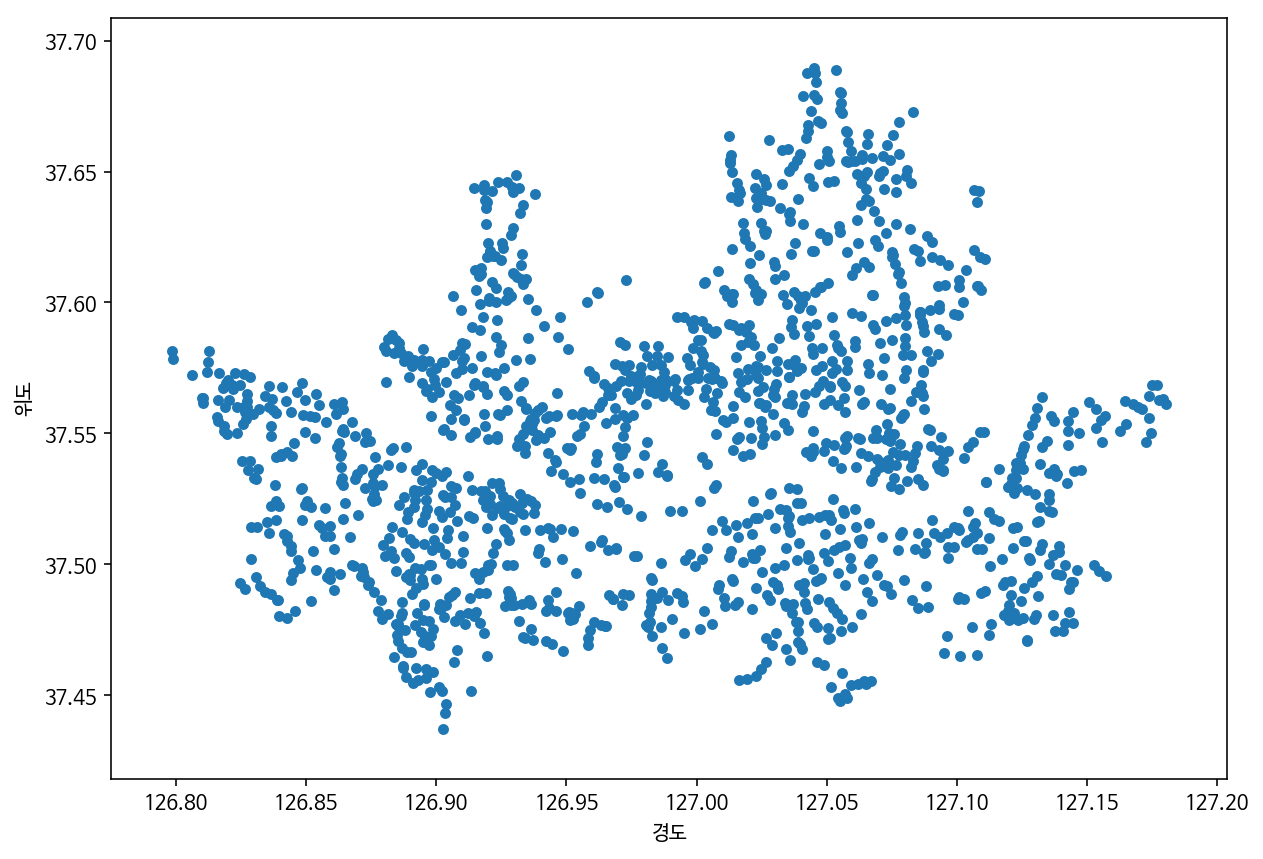

In [23]:
geo_df.plot.scatter(x='경도',y = '위도', figsize = (10,7))

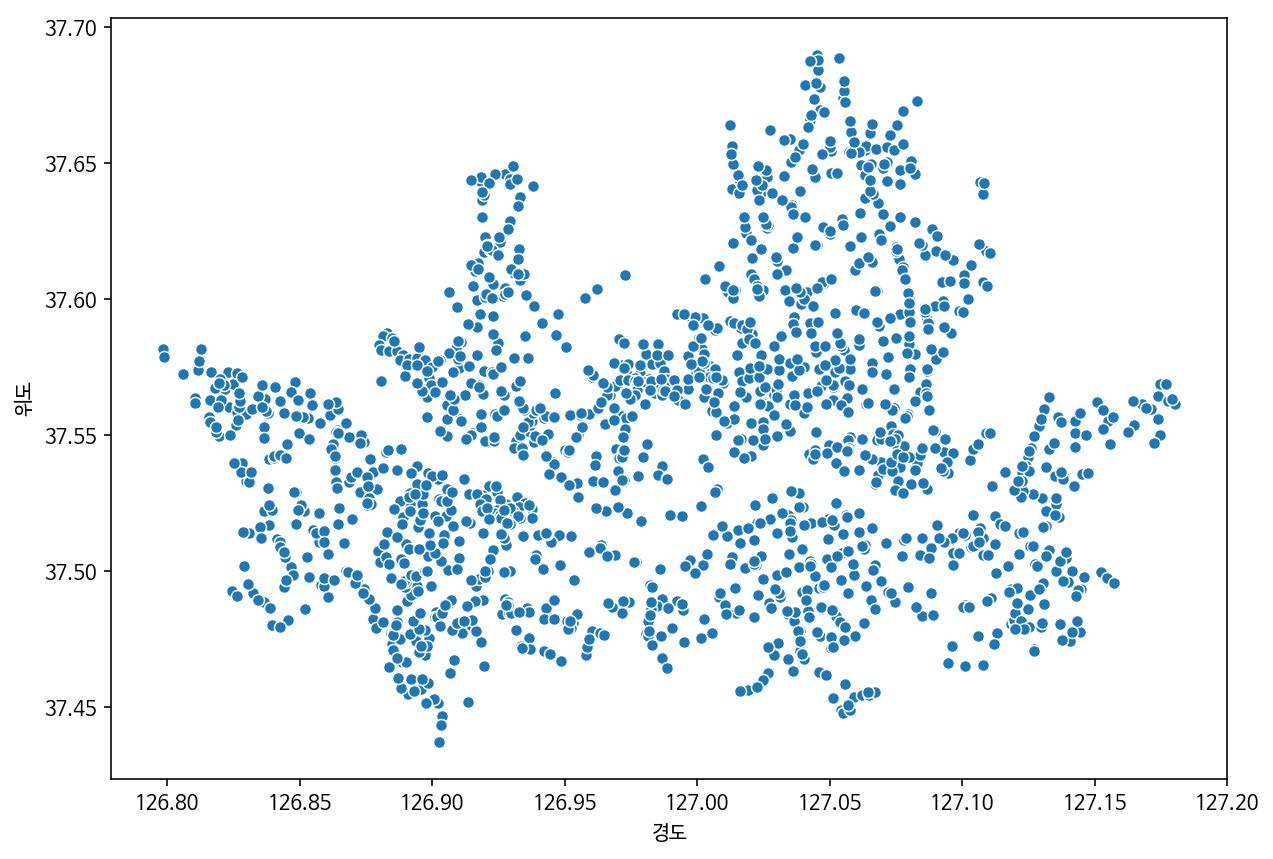

In [24]:
plt.figure(figsize = (10,7))
sns.scatterplot(data = geo_df, x =  '경도',  y = '위도')

In [0]:
df['주소'] = df['주소'].apply(lambda x : re.sub('  ', ' ', x))

In [0]:
df['구'] = df['주소'].apply(lambda x : x.strip().split(' ')[1])

In [30]:
df['구'].value_counts().head()

강남구     100
송파구      97
영등포구     90
강서구      84
마포구      77
Name: 구, dtype: int64

In [31]:
df['구'].value_counts().tail()

창동     1
동일로    1
시흥동    1
번동     1
갈현동    1
Name: 구, dtype: int64

In [32]:
df_gu = df[~df['구'].str.endswith('구')]
print(df_gu.shape)
df_gu2 = df_gu['구'].unique()
df_gu

(63, 8)


,대여소번호,대여소,거치대수,상태,주소,위도,경도,구
24,1024.0,강동구청 앞,10,운영중,서울특별시 성내동 546-3 강동구청 앞,37.529251,127.123108,성내동
25,1025.0,상일초등학교,10,운영중,서울특별시 상일동 440-3 상일초등학교,37.546841,127.172516,상일동
26,1026.0,대명초교 입구 교차로,14,운영중,서울특별시 명일동 59 대명초교 입구 교차로,37.546631,127.155884,명일동
27,1027.0,프라자 아파트 앞,20,운영중,서울특별시 길동 176-3 프라자 아파트 앞,37.535999,127.147697,길동
28,1028.0,포레스 주상복합 빌딩,10,운영중,서울특별시 성내동 119-2 포레스 주상복합 빌딩,37.533100,127.122780,성내동
29,1029.0,롯데 시네마,10,운영중,서울특별시 성내동 44-1 롯데 시네마,37.536541,127.125397,성내동
31,1030.0,미호 플랜트 앞,15,운영중,서울특별시 성내동 478 미호 플랜트 앞,37.527061,127.122070,성내동
32,1031.0,암사동 CBIS,15,운영중,서울특별시 암사동 440-13 암사동 CBIS,37.555851,127.129898,암사동
33,1032.0,선사고등학교,20,운영중,서울특별시 암사동 445 선사고등학교,37.556728,127.136208,암사동
34,1033.0,고덕동 아남아파트,10,운영중,서울특별시 고덕동 673 고덕동 아남아파트,37.557991,127.144707,고덕동


In [33]:
df_not_gu = df_gu[df_gu['구'].isin(df_gu2)]
df_not_gu.head()


,대여소번호,대여소,거치대수,상태,주소,위도,경도,구
24,1024.0,강동구청 앞,10,운영중,서울특별시 성내동 546-3 강동구청 앞,37.529251,127.123108,성내동
25,1025.0,상일초등학교,10,운영중,서울특별시 상일동 440-3 상일초등학교,37.546841,127.172516,상일동
26,1026.0,대명초교 입구 교차로,14,운영중,서울특별시 명일동 59 대명초교 입구 교차로,37.546631,127.155884,명일동
27,1027.0,프라자 아파트 앞,20,운영중,서울특별시 길동 176-3 프라자 아파트 앞,37.535999,127.147697,길동
28,1028.0,포레스 주상복합 빌딩,10,운영중,서울특별시 성내동 119-2 포레스 주상복합 빌딩,37.533100,127.122780,성내동


In [34]:
df_not_gu['구'].unique()

array(['성내동', '상일동', '명일동', '길동', '암사동', '고덕동', '강일동', '양재대로', '서울',
       '중화동', '면목동', '상봉동', '미아동', '수유동', '번동', '동일로', '창동', '망원2빗물펌프장',
       '가산동', '시흥동', '독산동', '사당동', '관악로', '서초동', '잠원동', '신원동', '양재동',
       '염곡동', '상암동', '진관동', '응암동', '녹번동', '불광로', '불광동', '증산동', '역촌동',
       '갈현동'], dtype=object)

In [35]:
dong = {'성내동':'강동구', '상일동':'강동구'}
dong['성내동']

'강동구'

In [0]:
# 구 컬럼에 추출된 정보가 어떤 구에 해당되는지 전처리 해준다.
gu = {'성내동':'강동구', '상일동':'강동구', '명일동':'강동구', '길동':'강동구', 
      '암사동':'강동구', '고덕동':'강동구', '강일동':'강동구', '양재대로':'강동구', 
      '서울':'송파구', '중화동':'중랑구', '면목동':'중랑구', '상봉동':'중랑구', 
      '미아동':'강북구', '수유동':'강북구', '번동':'강북구', '동일로':'노원구', 
      '창동':'도봉구', '망원2빗물펌프장':'마포구', '가산동':'금천구', 
      '시흥동':'금천구', '독산동':'금천구', '사당동':'동작구', '관악로':'관악구', 
      '서초동':'서초구', '잠원동':'서초구', '신원동':'서초구', '양재동':'서초구',
      '염곡동':'서초구', '상암동':'마포구', '진관동':'은평구', '응암동':'은평구', 
      '녹번동':'은평구', '불광로':'은평구', '불광동':'은평구', '증산동':'은평구', 
      '역촌동':'은평구', '갈현동':'은평구'}

In [39]:
"마포구"[-1]

'구'

In [41]:
"마포구"[-1] !='구'

False

In [0]:
df['구'] = df['구'].apply(lambda x: gu[x] if x[-1] != '구' else x)

In [43]:
df_gu = df['구'].value_counts()
print('데이터에 있는 구의 수: ', len(df_gu))
df_gu

데이터에 있는 구의 수:  25


강남구     100
송파구      98
영등포구     90
서초구      87
강서구      84
마포구      79
노원구      69
종로구      65
구로구      63
은평구      63
성동구      62
광진구      60
성북구      58
강동구      57
양천구      56
중랑구      51
동대문구     50
서대문구     49
관악구      48
금천구      45
중구       43
동작구      41
용산구      39
강북구      38
도봉구      34
Name: 구, dtype: int64

In [0]:
df.to_csv('data/bike_rent_station_gu.csv', index = False)

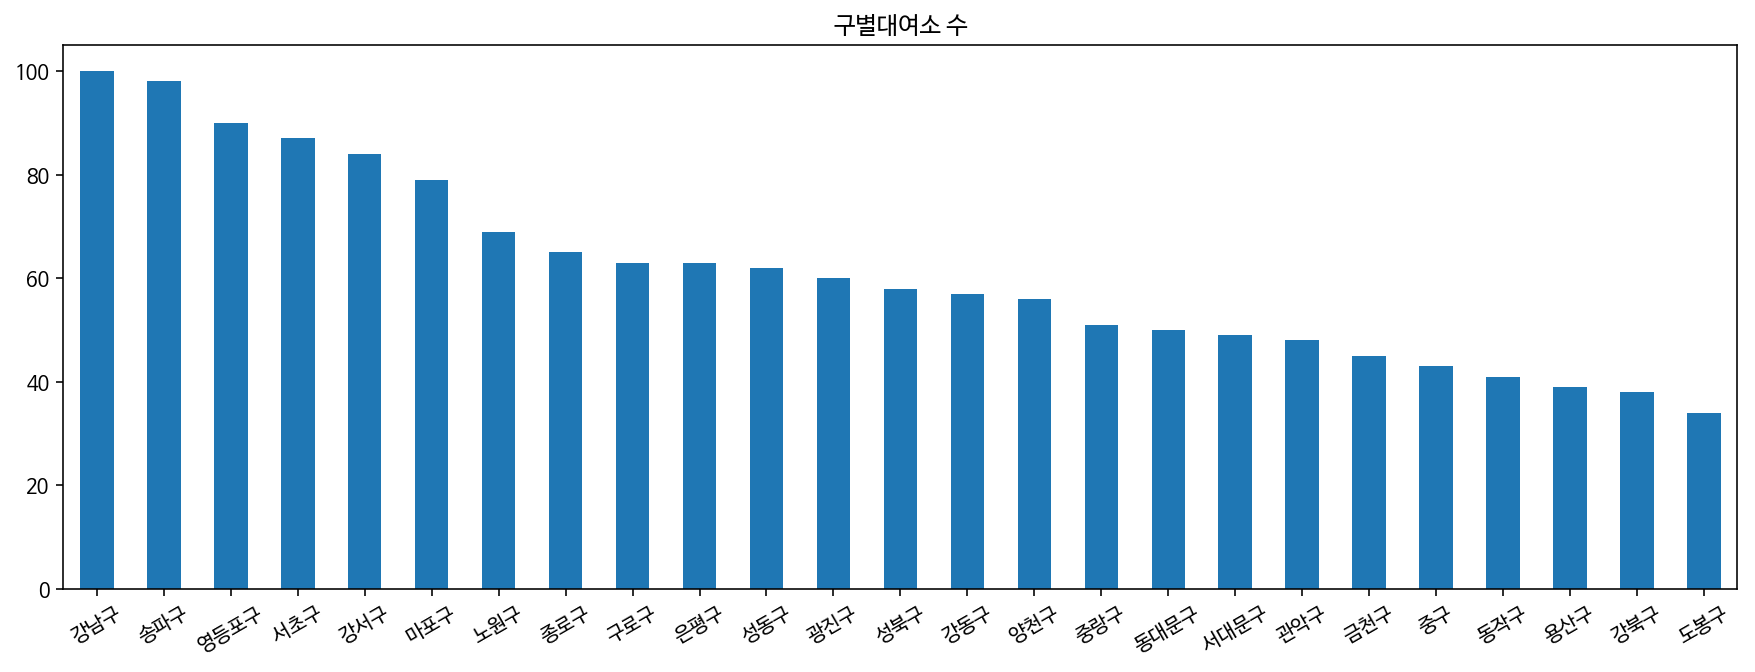

In [45]:
df_gu.plot(kind = 'bar', rot = 30, figsize =(15,5), title = '구별대여소 수')

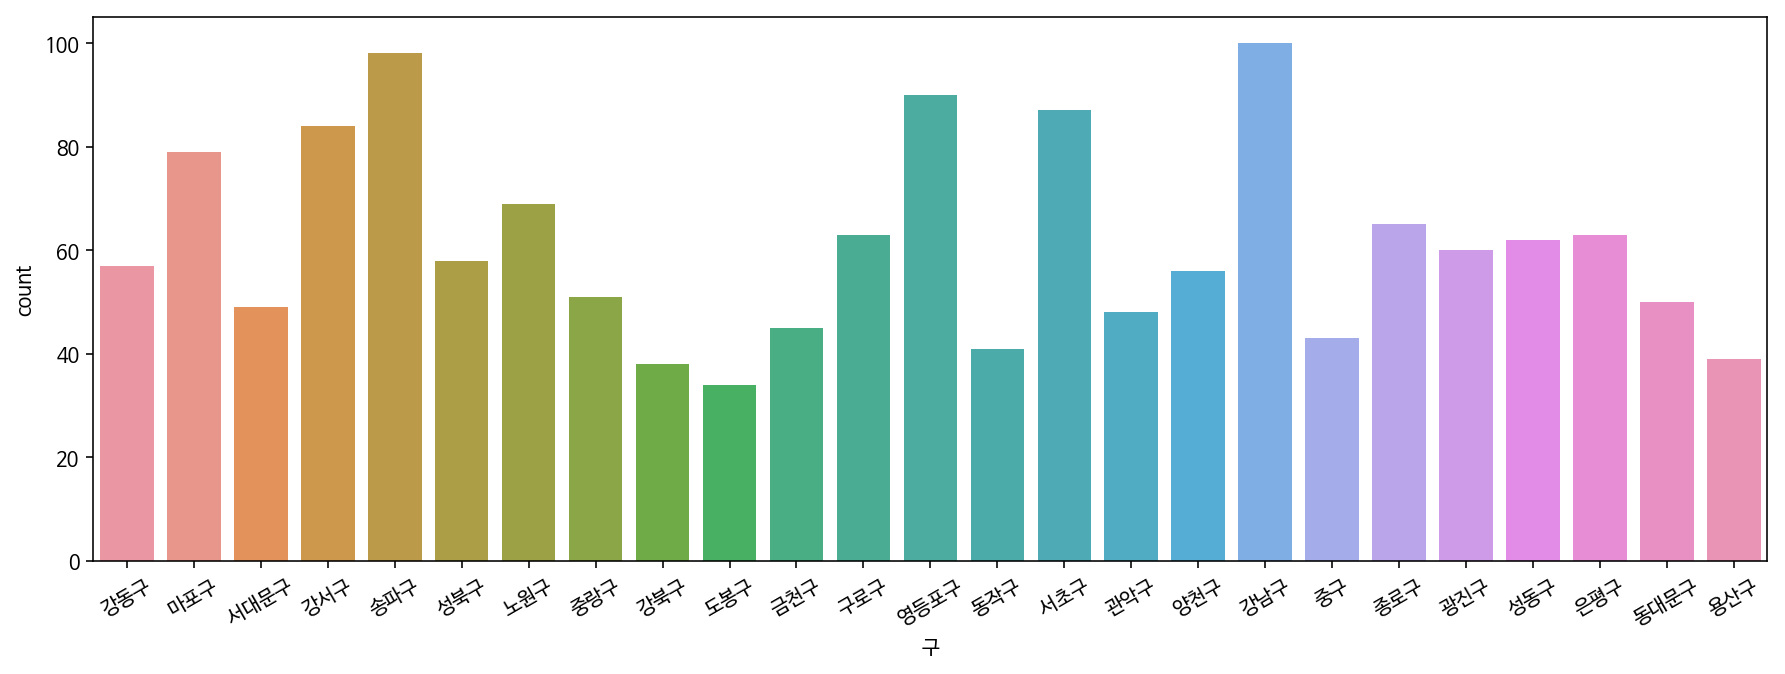

In [50]:
# 위와 같은 시각화를 seaborn 으로 보기
plt.figure(figsize=(15, 5))
plt.xticks(rotation=30)
sns.countplot(data=df, x='구')

In [51]:
geo_gu_df = df.loc[(df['위도']>37)&(df['경도']>125)]
geo_gu_df.shape

(1524, 8)

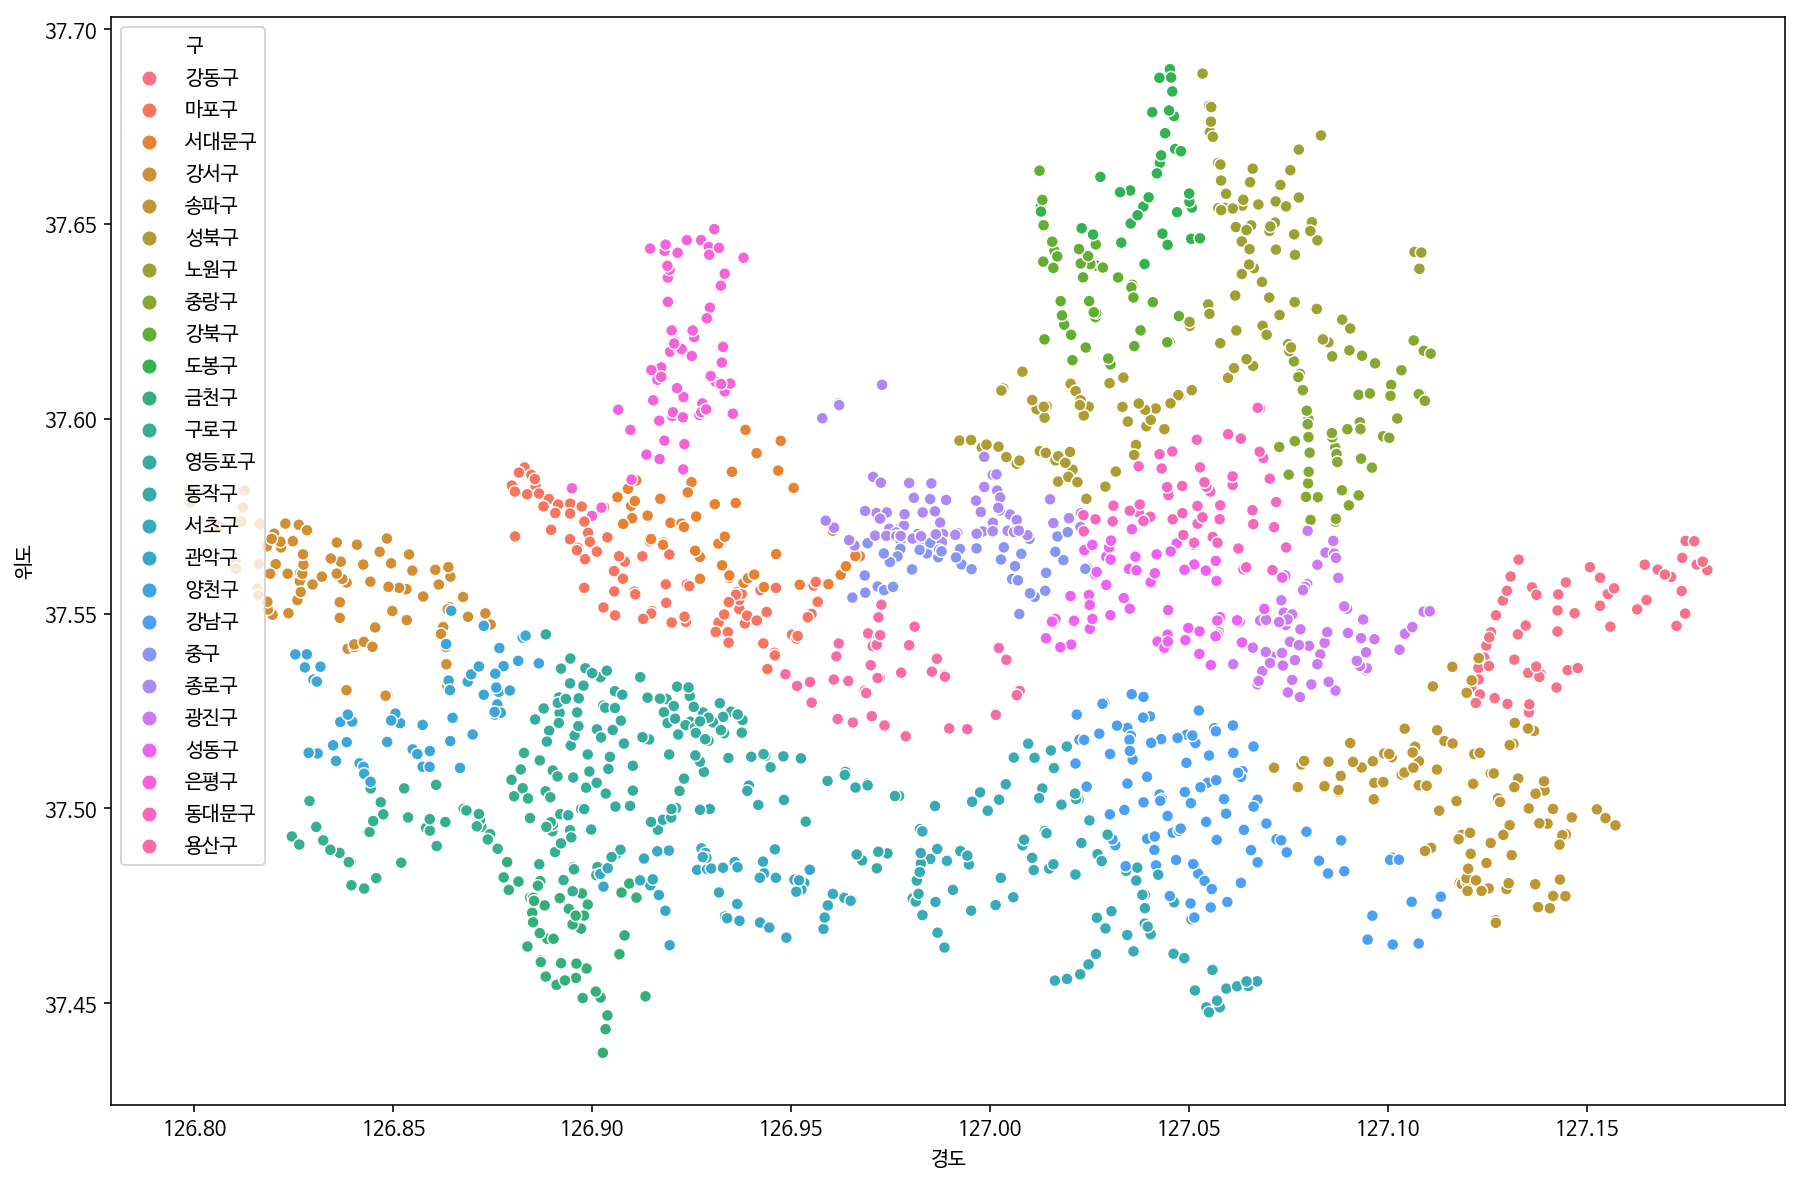

In [55]:
# 위경도에 오류가 있는 데이터를 제거한 geo_gu_df를 사용해 시각화 한다.
plt.figure(figsize=(15, 10))
sns.scatterplot(data=geo_gu_df, x='경도', y='위도', hue='구')

In [56]:
df_gu_lat_long = geo_gu_df.groupby(['구'])['위도', '경도'].mean()
df_gu_lat_long.head()

,위도,경도
구,,
강남구,37.499762,127.054771
강동구,37.547607,127.145626
강북구,37.632939,127.025282
강서구,37.557701,126.836699
관악구,37.480005,126.936353


In [58]:
df_gu_count = pd.DataFrame(df["구"].value_counts())
df_gu_count.colums = ['대여소수']
df_gu_count.head()

,구
강남구,100
송파구,98
영등포구,90
서초구,87
강서구,84


KeyError: ignored

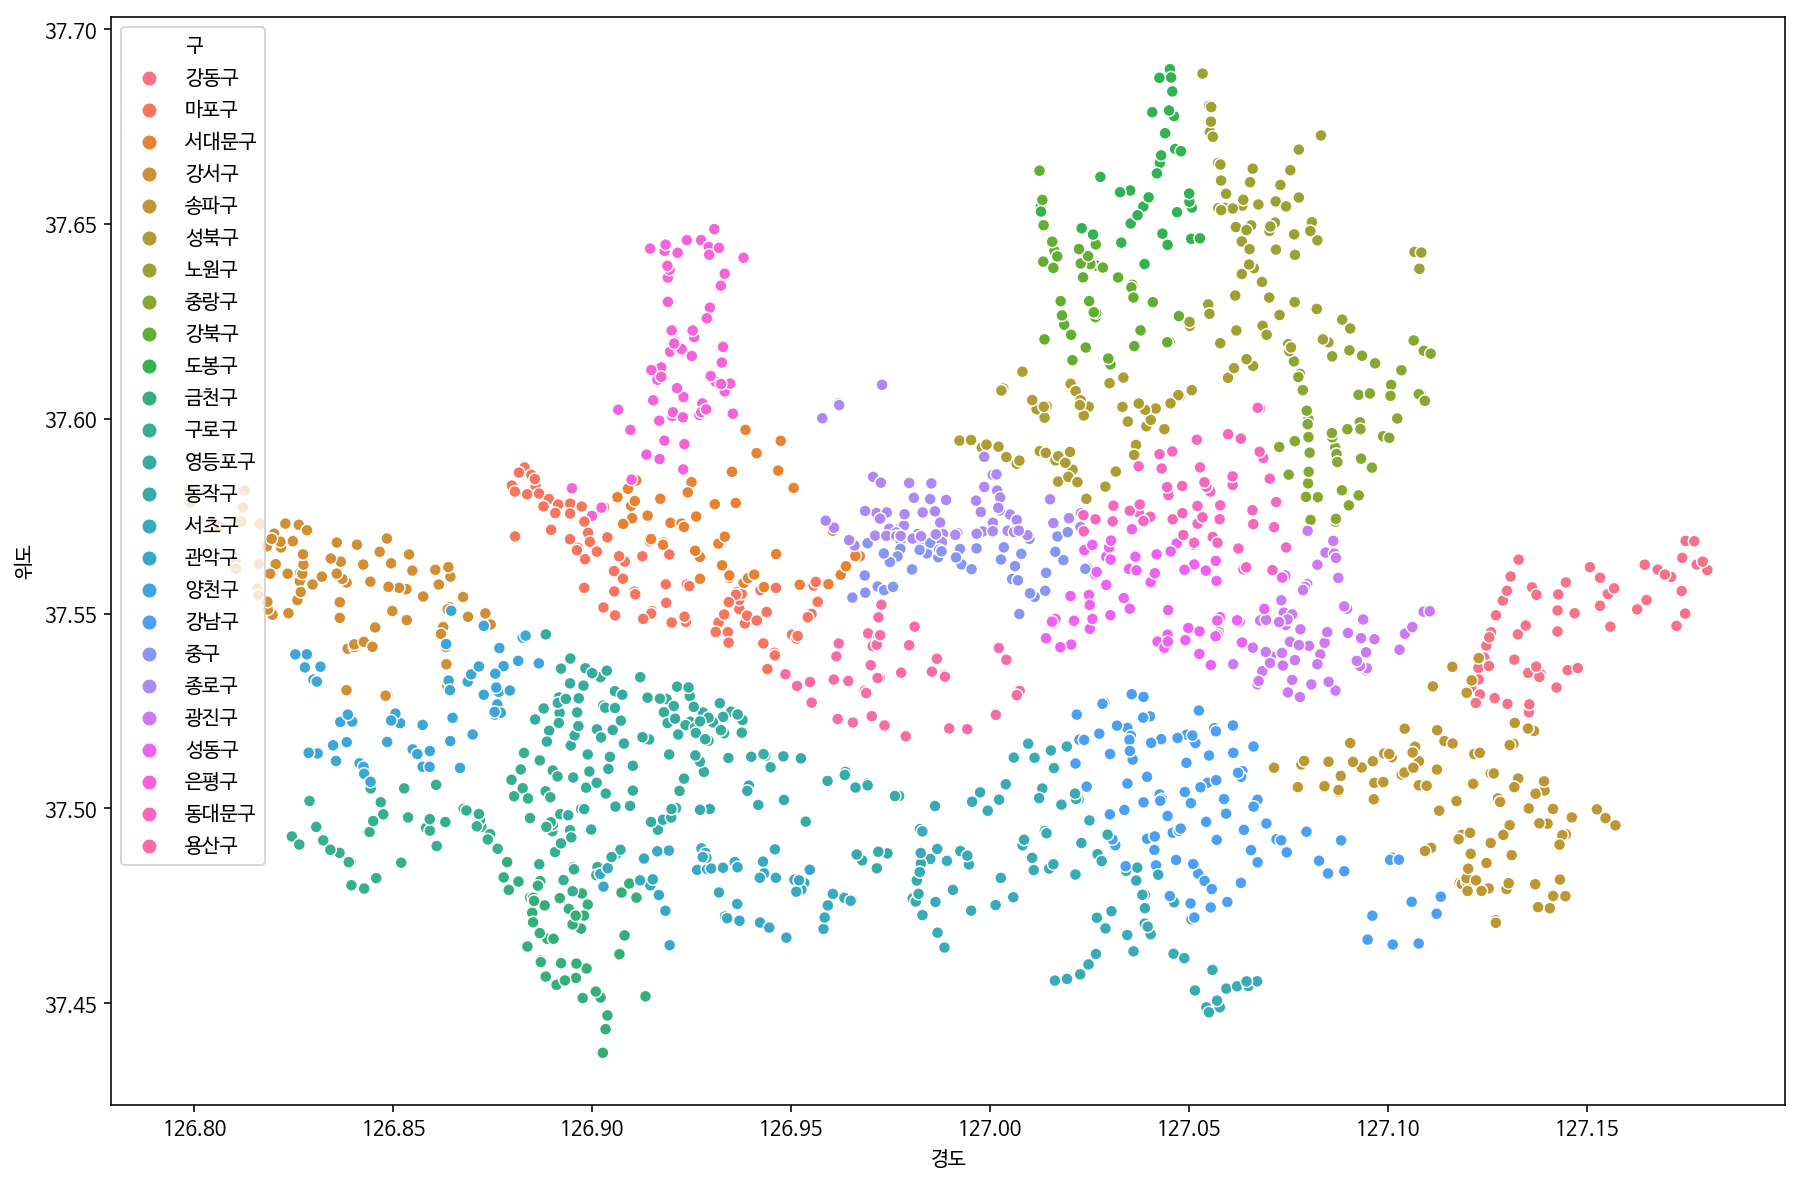

In [60]:
# 구별 대여소 수를 비교해 본다.
plt.figure(figsize=(15, 10))
sns.scatterplot(data=geo_gu_df, x='경도', y='위도', hue='구')
sns.scatterplot(data=df_gu_lat_long, x="경도", y="위도",
                size=df_gu_count["대여소수"], hue=df_gu_count["대여소수"],
                sizes=(100, 500))

In [63]:
%time
geo_df = geo_gu_df
map = folium.Map(location=[geo_df['위도'].mean(), geo_df['경도'].mean()], zoom_start=12)

for n in geo_df.index:
    loc_name = geo_df.loc[n, '대여소']
    
    icon_color = 'green'
    folium.Circle(
        location=[geo_df.loc[n, '위도'], geo_df.loc[n, '경도']],
        popup=loc_name,
        radius=20,
        color=icon_color,
        fill=True,
        fill_color=icon_color
    ).add_to(map)
    
map

CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 8.34 µs
